# Exercise XP GOLD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

C:\Users\yonab\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yonab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\yonab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# 1.
Write a function to calculate the difference between the maximum and the minimum values of a given NumPy array
along the second axis

In [2]:
def difference_secaxis(arr):
    if arr.shape[0]>1:
        return max(arr[1,:])-min(arr[1,:])
    else:
        return 'The second axis doesn\'t exist'

np.random.seed(0)    
z= np.random.randint(1,100,(5,6))
difference_secaxis(z)

67

# 2.
Find a numpy function to limit the values of an array between two numbers.
Use this function to limit the given array between 20 and 80

**x = np.arange(100)**

In [3]:
x = np.arange(100)
np.clip(x,20, 80)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 80, 80, 80, 80,
       80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80])

# 3.
Create a NumPy array full of 1’s (there is a function for this) whatever shape you want.
Convert it from floats to ints

In [4]:
z = np.ones(10)
y = [int(i) for i in z]
y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# 4 .
The following data is currently in wide format
Use pandas’ melt() function to convert it to long format.
Great example of these definitions here (https://en.wikipedia.org/wiki/Wide_and_narrow_data)

Use the pivot() function to convert it back to wide format.



In [5]:
df = pd.DataFrame({'Name': {0: 'Megane', 1: 'Yonah', 2: 'Avner'}, 
                   'Course': {0: 'Masters', 1: 'Bachelors', 2: 'Graduate'}, 
                   'Nationality': {0: "FR", 1: "US", 2: "FR"}}) 

long_version = pd.melt(df, id_vars=['Name'], value_vars=['Course', 'Nationality'])
short_version = long_version.pivot(index='variable',columns='Name',values='value')

In [6]:
short_version

Name,Avner,Megane,Yonah
variable,,,
Course,Graduate,Masters,Bachelors
Nationality,FR,FR,US


# 5.
Calculate the average percent of tips out of the total bill that women leave, vs. men.
Present the data in one dataframe

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
fem_tip = (sum(df[df['sex']=='Female']['tip'])/sum(df[df['sex']=='Female']['total_bill']))*100
male_tip = (sum(df[df['sex']=='Male']['tip'])/sum(df[df['sex']=='Male']['total_bill']))*100

pd.options.display.float_format = '{:,.2f}'.format
df1 = pd.DataFrame({
    'avg_percent_women':[fem_tip],
    'avg_percent_men':[male_tip]
})
df1

,avg_percent_women,avg_percent_men
0,15.69,14.89


# 6.
Find the day and the time in which the most tip is paid (in absolute value)


In [9]:
df['%tip'] = df['tip']/df['total_bill']*100
df[df['%tip'] == df['%tip'].max()]

,total_bill,tip,sex,smoker,day,time,size,%tip
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03


# 7.
With the following DataFrame, use Matplotlib create trend plots (all on the same figure)
- y_1 according to x, color skyblue, with blue ‘o’ markers of size 8. A normal line of width 4.
- y_2 according to x, color red, no marker, regular line with width 4
- y_3 according to x, color green, no marker, dashed line with width 2, and a legend “y_3”

In [10]:
df = pd.DataFrame({'x': range(1,11), \
                   'y_1': np.random.randn(10), \
                   'y_2': np.random.randn(10) + range(1,11), \
                   'y_3': np.random.randn(10)+range(11,21) })

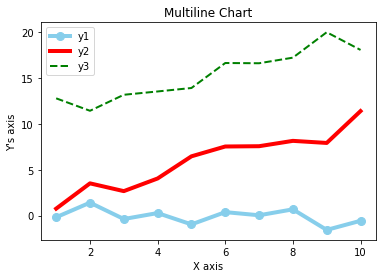

In [11]:
plt.plot(df['x'],df['y_1'],marker='o',color='skyblue',label='y1', linewidth=4,markersize=8)
plt.plot(df['x'],df['y_2'],'r',label='y2', linewidth=4)
plt.plot(df['x'],df['y_3'],'g--',label='y3', linewidth=2)


plt.title('Multiline Chart')

plt.ylabel('Y\'s axis')
plt.xlabel('X axis')

plt.legend()
plt.show()

# 8.
Back to the car data:

- Drop all rows with nan values in the columns “RPM”, “Type” or “Price”
- Plot the relation between the variables “RPM” and “Price” on a scatter plot
- Color the data points by the variable “Type”
- Add a title and axis names
- Add a legend



In [12]:
url='https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(url)
df.head(2)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.90,15.90,18.80,25.00,31.00,None,Front,...,5.00,177.00,102.00,68.00,37.00,26.50,NaN,"2,705.00",non-USA,Acura Integra
1,NaN,Legend,Midsize,29.20,33.90,38.70,18.00,25.00,Driver & Passenger,Front,...,5.00,195.00,115.00,71.00,38.00,30.00,15.00,"3,560.00",non-USA,Acura Legend


In [13]:
df.dropna(subset = ["RPM","Type","Price"], inplace=True)

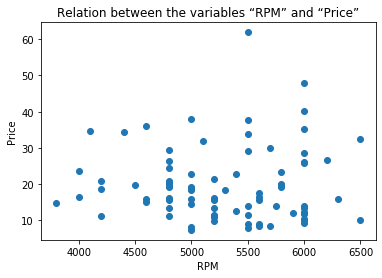

In [14]:
# Scatter Plot
plt.scatter(df['RPM'],df['Price'])
plt.xlabel('RPM')
plt.ylabel('Price')
plt.title('Relation between the variables “RPM” and “Price”')
plt.show()

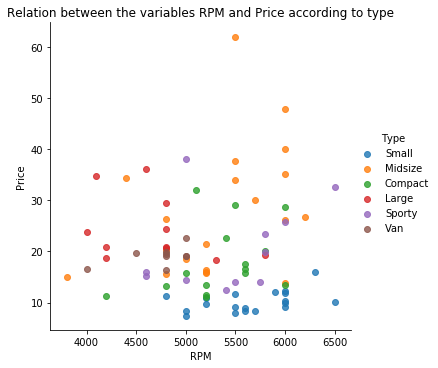

In [15]:
import seaborn as sns
sns.lmplot('RPM', 'Price', data=df, hue='Type', fit_reg=False)
plt.title('Relation between the variables RPM and Price according to type')
plt.show()

# 9.

Create 5 subplots in a plot, and fill each plot with a different function of your choice.
Color each plot in a different color. (NumPy has many functions, such as np.log())

After showing the plot, recreate the plots but now have the plots sharing their x and y axis.


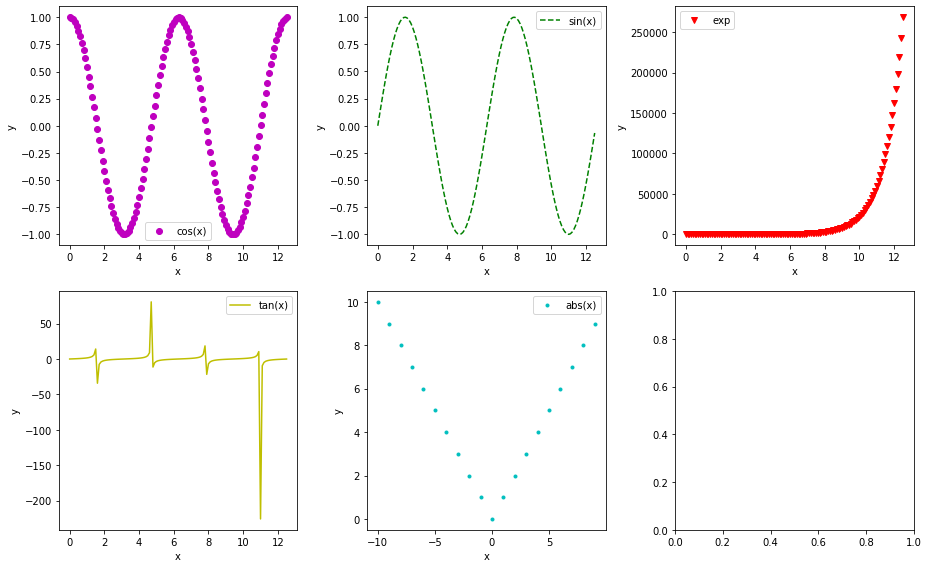

In [16]:
fig,ax = plt.subplots(2,3,figsize=(13,8))

x = np.arange(0,4*np.pi,0.1)

ax[0,0].plot(x,np.cos(x),'mo',label='cos(x)')
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].legend()

ax[0,1].plot(x,np.sin(x),'g--',label='sin(x)')
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('y')
ax[0,1].legend()

ax[0,2].plot(x,np.exp(x),'rv',label='exp')
ax[0,2].set_xlabel('x')
ax[0,2].set_ylabel('y')
ax[0,2].legend()

ax[1,0].plot(x,np.tan(x),'y',label='tan(x)')
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1,0].legend()

x1 = np.arange(-10,10)
ax[1,1].plot(x1,np.abs(x1),'c.',label='abs(x)')
ax[1,1].set_xlabel('x')
ax[1,1].set_ylabel('y')
ax[1,1].legend()

fig.tight_layout()

# 10.

We’re going to show just how much faster NumPy is compared to regular for loops and Python lists.
Let’s test different types on operations on different amounts of large data.
Use the process_time function from Python’s time module to record the time taken

Use the following sizes for the data:
[10, 1000, 10000, 50000, 10000, 1000000, 5000000, 10000000]

For each size, perform the following operations using a regular Python list, then using a NumPy array and time the
entire operation.

- Add 5 to each element in the array
- create two arrays of the same size and add them together
- create two arrays of the same size and concatenate them
- create two arrays of the same size and compute their dot product

Plot these into 4 plots. Each plot is an operations, one line showing the list and the other showing the NumPy array.
The x axis should be the array size and the y axis should be the time it takes.

To get an idea, here is a plot of the first one: (You should still write the code for it)


In [17]:
import time
import random

size = [10, 1000, 10000, 50000, 100000, 1000000, 5000000, 10000000]

py_time =[]
def python_add_five(size):
    for i in size:
        print(i)
        data = range(i)
        start = time.time_ns()
        data = [i+5 for i in data]
        time_taken = time.time_ns() - start
        py_time.append(time_taken)
        
python_add_five(size)
py_time

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 997900, 4988500, 6987600, 79172400, 386984800, 791671600]

In [18]:
np_time = []
def np_add_five(size):
    for i in size:
        print(i)
        data = np.arange(i)
        start = time.time_ns()
        data += 5
        time_taken = time.time_ns() - start
        np_time.append(time_taken)
        
np_add_five(size)
np_time

10
1000
10000
50000
100000
1000000
5000000
10000000


[997000, 0, 0, 0, 0, 997200, 3026600, 6951400]

In [19]:
py_time2 =[]
def python_add_arr(size):
    for i in size:
        print(i)
        data = range(i)
        data2 = range(i)
        start = time.time_ns()
        sum_list = [item1+item2 for item1,item2 in zip(data,data2)]
        time_taken = time.time_ns() - start
        py_time2.append(time_taken)
        
python_add_arr(size)
py_time2

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 965800, 3988500, 10972400, 105744100, 518464800, 1098660700]

In [20]:
np_time2 = []
def np_add_arr(size):
    for i in size:
        print(i)
        data = np.arange(i)
        data2 = np.arange(i)
        start = time.time_ns()
        data + data2
        time_taken = time.time_ns() - start
        np_time2.append(time_taken)
        
np_add_arr(size)
np_time2

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 0, 1003500, 990900, 2991200, 13960900, 18948000]

In [21]:
py_time3 =[]
def python_concat_arr(size):
    for i in size:
        print(i)
        data = list(range(i))
        data2 = list(range(i))
        start = time.time_ns()
        concat = data+data2
        time_taken = time.time_ns() - start
        py_time3.append(time_taken)
        
python_concat_arr(size)
py_time3

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 1026000, 1999400, 3022600, 19946600, 108946700, 331026100]

In [22]:
np_time3 = []
def np_concat_arr(size):
    for i in size:
        print(i)
        data = np.arange(i)
        data2 = np.arange(i)
        start = time.time_ns()
        np.concatenate((data, data2), axis=0)
        time_taken = time.time_ns() - start
        np_time3.append(time_taken)
        
np_concat_arr(size)
np_time3

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 0, 1001700, 0, 4986800, 23936500, 40118400]

In [23]:
py_time4 =[]
def python_dot_arr(size):
    for i in size:
        print(i)
        data = list(range(i))
        data2 = list(range(i))
        start = time.time_ns()
        sum([x*y for x,y in zip(data,data2)])
        time_taken = time.time_ns() - start
        py_time4.append(time_taken)
        
python_dot_arr(size)
py_time4

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 998200, 1994200, 10004800, 16953700, 124405300, 603373000, 1247350800]

In [24]:
np_time4 = []
def np_dot_arr(size):
    for i in size:
        print(i)
        data = np.arange(i)
        data2 = np.arange(i)
        start = time.time_ns()
        np.dot(data, data2)
        time_taken = time.time_ns() - start
        np_time4.append(time_taken)
        
np_dot_arr(size)
np_time4

10
1000
10000
50000
100000
1000000
5000000
10000000


[0, 0, 0, 0, 0, 984900, 5981300, 12002400]

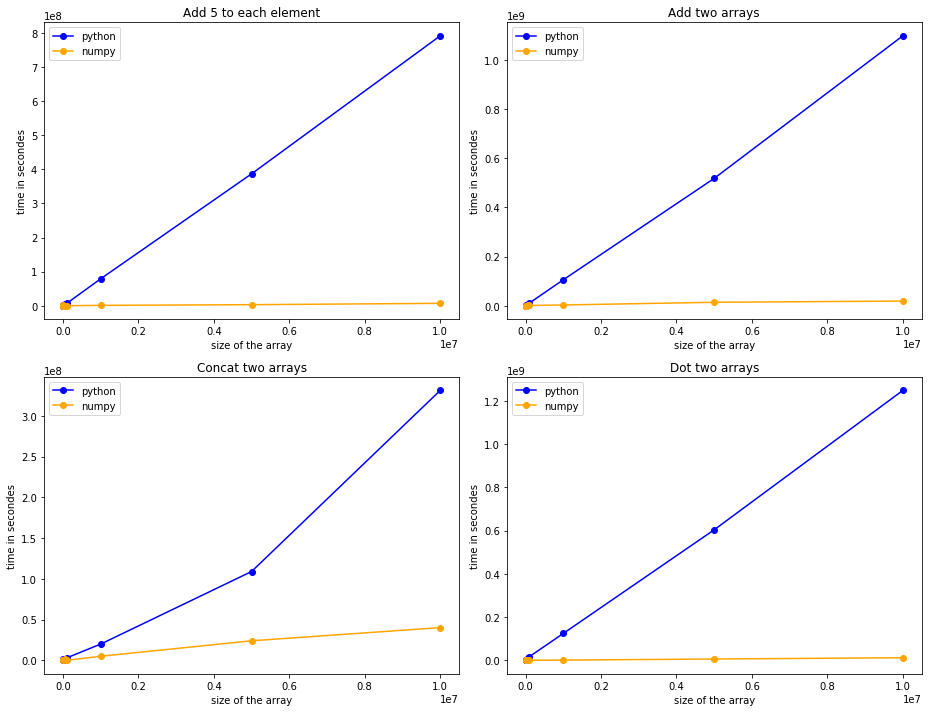

In [25]:
fig,ax = plt.subplots(2,2,figsize=(13,10))

ax[0,0].plot(size,py_time,'b',marker='o',label='python')
ax[0,0].plot(size,np_time,'orange',marker='o',label='numpy')
ax[0,0].set_xlabel('size of the array')
ax[0,0].set_ylabel('time in secondes')
ax[0,0].set_title('Add 5 to each element')
ax[0,0].legend()

ax[0,1].plot(size,py_time2,'b',marker='o',label='python')
ax[0,1].plot(size,np_time2,'orange',marker='o',label='numpy')
ax[0,1].set_xlabel('size of the array')
ax[0,1].set_ylabel('time in secondes')
ax[0,1].set_title('Add two arrays')
ax[0,1].legend()

ax[1,0].plot(size,py_time3,'b',marker='o',label='python')
ax[1,0].plot(size,np_time3,'orange',marker='o',label='numpy')
ax[1,0].set_xlabel('size of the array')
ax[1,0].set_ylabel('time in secondes')
ax[1,0].set_title('Concat two arrays')
ax[1,0].legend()

ax[1,1].plot(size,py_time4,'b',marker='o',label='python')
ax[1,1].plot(size,np_time4,'orange',marker='o',label='numpy')
ax[1,1].set_xlabel('size of the array')
ax[1,1].set_ylabel('time in secondes')
ax[1,1].set_title('Dot two arrays')
ax[1,1].legend()

fig.tight_layout()